# Classification

This notebook uses PointNet++ to classify 3D point clouds as car or not. <br>
Input: 3D point clouds generated by SpareNet

Reference: https://github.com/yanx27/Pointnet_Pointnet2_pytorch

## Prerequisites installation

In [1]:
!git clone https://github.com/anyaviswa/CMPE295B-3D-Construction-GAN.git

Cloning into 'CMPE295B-3D-Construction-GAN'...
remote: Enumerating objects: 346, done.
remote: Counting objects: 100% (346/346), done.
remote: Compressing objects: 100% (266/266), done.
remote: Total 346 (delta 65), reused 337 (delta 62), pack-reused 0
Receiving objects: 100% (346/346), 113.58 MiB | 31.44 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (258/258), done.


In [2]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.12-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
reinstalling: python-3.7.1-h0371630_7 ...
Python 3.7.1
reinstalling: ca-certificates-2018.03.07-0 ...
reinstalling: conda-env-2.6.0-1 ...
reinstalling: libgcc-ng-8.2.0-hdf63c60_1 ...
reinstalling: libstdcxx-ng-8.2.0-hdf63c60_1 ...
reinstalling: libffi-3.2.1-hd88cf55_4 ...
reinstalling: ncurses-6.1-he6710b0_1 ...
reinstalling: openssl-1.1.1a-h7b6447c_0 ...
reinstalling: xz-5.2.4-h14c3975_4 ...
reinstalling: yaml-0.1.7-had09818_2 ...
reinstalling: zlib-1.2.11-h7b6447c_3 ...
reinstalling: libedit-3.1.20170329-h6b74fdf_2 ...
reinstalling: readline-7.0-h7b6447c_5 ...
reinstalling: tk-8.6.8-hbc83047_0 ...
reinstalling: sqlite-3.26.0-h7b6447c_0 ...
reinstalling: asn1crypto-0.24.0-py37_0 ...
reinstalling: certifi-2018.11.29-py37_0 ...
reinstalling: chardet-3.0.4-py37_1 ...
reinstalling: idna-2.8-py37_0 ...
reinstalling: pycosat-0.6.3-py37h14c3975_0 ...
reinstalling: pycparser-2.19-py37_0 ...
reinstalling: pysocks-1.6.8-py37_0 ...
reinstalling: ruamel_yaml-0.15.46-py37h14c3975

--2021-12-03 08:08:12--  https://repo.continuum.io/miniconda/Miniconda3-4.5.12-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.12-Linux-x86_64.sh [following]
--2021-12-03 08:08:12--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.12-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69826864 (67M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.12-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0%  110M 1s
    50K .......... .......... .......... .......... ..........

In [3]:
!conda install pytorch==1.6.0 cudatoolkit=10.1 -c pytorch

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / don

In [4]:
cd CMPE295B-3D-Construction-GAN/PointNet++

/content/CMPE295B-3D-Construction-GAN/PointNet++


In [5]:
!pip install tqdm

     |████████████████████████████████| 76 kB 3.6 MB/s 


In [6]:
!pip install pandas

     |████████████████████████████████| 11.5 MB 9.8 MB/s 
     |████████████████████████████████| 503 kB 48.6 MB/s 
     |████████████████████████████████| 247 kB 108.9 MB/s 


In [8]:
!ls ./data/modelnet40_normal_resampled

car1.zip		    modelnet10_train.txt
car2.zip		    modelnet40_shape_names.txt
filelist.txt		    modelnet40_test.txt
modelnet10_shape_names.txt  modelnet40_train.txt
modelnet10_test.txt	    original_modelnet40_train.txt


In [9]:
import os

data_dir_name = './data/modelnet40_normal_resampled/car'
if not os.path.exists(data_dir_name):
  os.makedirs(data_dir_name)

In [ ]:
# Download data zip folders: car1.zip, car2.zip from the below link
# https://drive.google.com/drive/folders/1VEyCr-ZbQE6I4LyXZVJKloeAYgyr6Cqt?usp=sharing

# upload it to ./data/modelnet40_normal_resampled/ folder
# These zip folders contains the following data
# 1. original dataset pointed in the PointNet++ paper
# 2. Sparenet 3d point completion results (these only used for classification)
# Files included in ./data/modelnet40_normal_resampled/modelnet40_test.txt will only be considered for classification
!sudo unzip -j ./data/modelnet40_normal_resampled/car1.zip -d ./data/modelnet40_normal_resampled/car
!sudo unzip -j ./data/modelnet40_normal_resampled/car2.zip -d ./data/modelnet40_normal_resampled/car

## Result classification using PointNet++

### How to change the image being used for classification?
For classification, all the images present in ./data/modelnet40_normal_resampled/modelnet40_test.txt are considered. <br>

If you want to test particular images alone, you can add or remove images in this folder accordingly.

In [13]:
# By default, results are appended ./results folder
# --results_dir <folder-path-to-store-results> can be used for custom folders
!python test_classification.py --log_dir pointnet2_ssg_wo_normals

PARAMETER ...
Namespace(batch_size=24, gpu='0', log_dir='pointnet2_ssg_wo_normals', num_category=40, num_point=1024, num_votes=3, results_dir='./results', use_cpu=False, use_normals=False, use_uniform_sample=False)
Load dataset ...
The size of test data is 936
  0% 0/39 [00:00<?, ?it/s]Class accuracy: 13
  3% 1/39 [00:12<07:39, 12.09s/it]Class accuracy: 16
  5% 2/39 [00:14<03:58,  6.46s/it]Class accuracy: 18
  8% 3/39 [00:17<02:47,  4.65s/it]Class accuracy: 17
 10% 4/39 [00:19<02:09,  3.71s/it]Class accuracy: 18
 13% 5/39 [00:20<01:39,  2.92s/it]Class accuracy: 13
 15% 6/39 [00:21<01:15,  2.30s/it]Class accuracy: 15
 18% 7/39 [00:23<01:07,  2.10s/it]Class accuracy: 16
 21% 8/39 [00:25<01:01,  1.97s/it]Class accuracy: 14
 23% 9/39 [00:26<00:51,  1.73s/it]Class accuracy: 12
 26% 10/39 [00:27<00:47,  1.62s/it]Class accuracy: 18
 28% 11/39 [00:29<00:42,  1.51s/it]Class accuracy: 15
 31% 12/39 [00:30<00:37,  1.40s/it]Class accuracy: 15
 33% 13/39 [00:31<00:36,  1.39s/it]Class accuracy: 17
 

In [14]:
# Rewriting classification results in sorted order - for easier verification
filename = './results/classification_results.txt'
infile = open(filename)
data=infile.readlines()
infile.close()
data = sorted(data)
outfile = open(filename, "w")
for i in data:
  outfile.write(i)
outfile.close()

Accuracy = 0.8493589743589743


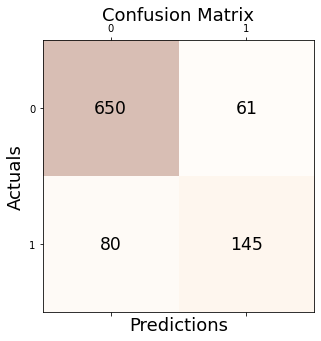

Precision: 0.704
F1 Score: 0.673
Accuracy sklearn: 0.849
Recall: 0.644


In [15]:
#Calculating accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# data annotation done for this project to create ground truth
groundtruthFile = './results/ground-truth.txt'

resFile = './results/classification_results.txt'
gf = open(groundtruthFile)
groundtruth = gf.readlines()
gf.close()
rf = open(resFile)
results = rf.readlines()
rf.close()
count=0
groundtruth_arr = []
result_arr = []
for g, r in zip(groundtruth, results):
  g = g.replace('\n', '')
  r = r.replace('\n', '')
  splits1 = g.split(',')
  splits2 = r.split(',')
  # print(splits1)
  # print(splits2)
  groundtruth_arr.append(int(splits1[1]))
  result_arr.append(int(splits2[1]))
  if(splits1[0] == splits2[0] and splits1[1] == splits2[1]):
    count+=1
accuracy = count/len(groundtruth)
print(f'Accuracy = {accuracy}')
conf_matrix = confusion_matrix(y_true=groundtruth_arr, y_pred=result_arr)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('Precision: %.3f' % precision_score(groundtruth_arr, result_arr))
print('F1 Score: %.3f' % f1_score(groundtruth_arr, result_arr))
print('Accuracy sklearn: %.3f' % accuracy_score(groundtruth_arr, result_arr))
print('Recall: %.3f' % recall_score(groundtruth_arr, result_arr))

## Visualization

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
dir="./data/modelnet40_normal_resampled/car/"

files=[]
output=[]
with open("./data/modelnet40_normal_resampled/modelnet40_test.txt","r") as wf:
    files.append(wf.read())
with open("./results/Output.txt","r") as wf:
    output.append(wf.read())

files = files[0].split('\n')
output = output[0].split('\n')
# for i in range(0,len(files)):
for i in range(0,100):
  file_name=dir+files[i]+".txt"
  print(output[i])
  pcd = pd.read_csv(file_name, header=None)
  #fig = px.scatter_3d(df, x=0, y=1, z=2)
  #fig.show()
  azim = -45 + 90 * i
  elev = 30
  cmap="Reds"
  sizes=None
  zdir="y"
  xlim=(-0.3, 0.3)
  ylim=(-0.3, 0.3)
  zlim=(-0.3, 0.3)
  if sizes is None:
    sizes = [0.5 for i in range(1)]
    fig = plt.figure(figsize=(3,9))
    elev = 30
  for i in range(3):  # plot three views
        azim = -45 + 90 * i
        #for j, (pcd, size) in enumerate(zip(pcds, sizes)):
        color = pcd[0]
        ax = fig.add_subplot(3, 1, i+1, projection="3d")
        ax.view_init(elev, azim)
        #print(pcd[0])

        # ax.scatter(pcd[0], pcd[1], pcd[2], zdir=zdir, c=color, s=size, cmap=cmap, vmin=-1, vmax=0.5)
        ax.scatter(pcd[0], pcd[1], pcd[2], zdir=zdir, c=color, s=0.5, cmap=cmap, vmin=-1, vmax=0.5)
        ax.set_axis_off()
                    
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_zlim(zlim)

  plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9, wspace=0.1, hspace=0.1)
  plt.show()
  plt.close(fig)

Output hidden; open in https://colab.research.google.com to view.